In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data=pd.read_csv('../LiquidityMomentum/liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


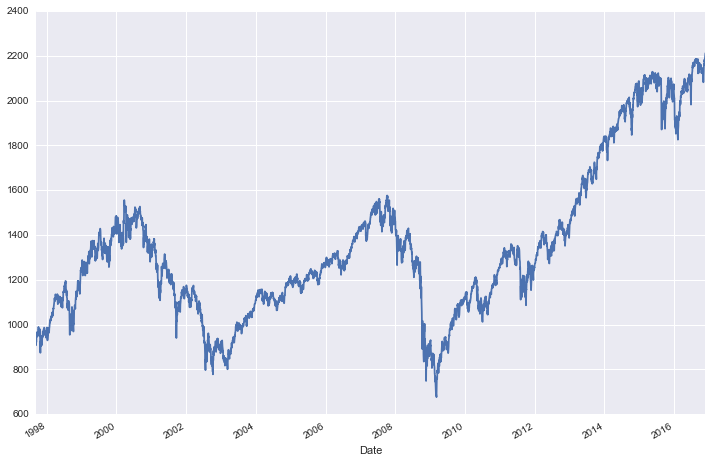

In [3]:
data.ES.dropna().plot()

# Calculate Zscores on single markets and understand distribution
Using just S&P futures.  I'm trying to undrstand the trade offs between look backs on the distributions.  But the basic formula is easy:

$$ Z = \frac{px - \mu_{ew20day}}{\sigma_{ew20day}} $$

In [4]:
df=pd.DataFrame()
df['price']=data.ES.dropna()
df['Avg']=pd.ewma(df.price,20)
df['STD']=pd.ewmstd(df.price,20)
df['zscore']=(df.price-df.Avg)/df.STD

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)


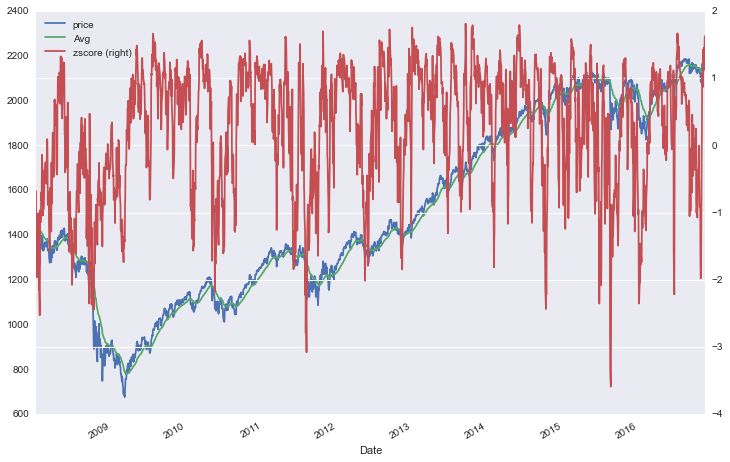

In [5]:
df[['price','Avg','zscore']]['2008':].plot(secondary_y='zscore')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


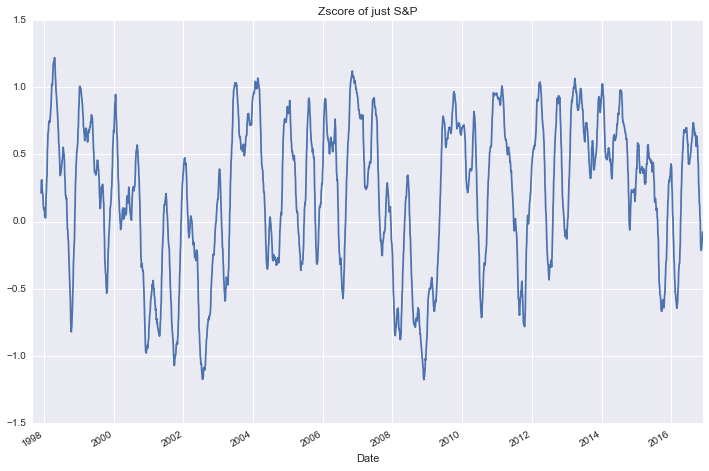

In [6]:
pd.rolling_mean(df.zscore,60).plot(title='Zscore of just S&P')

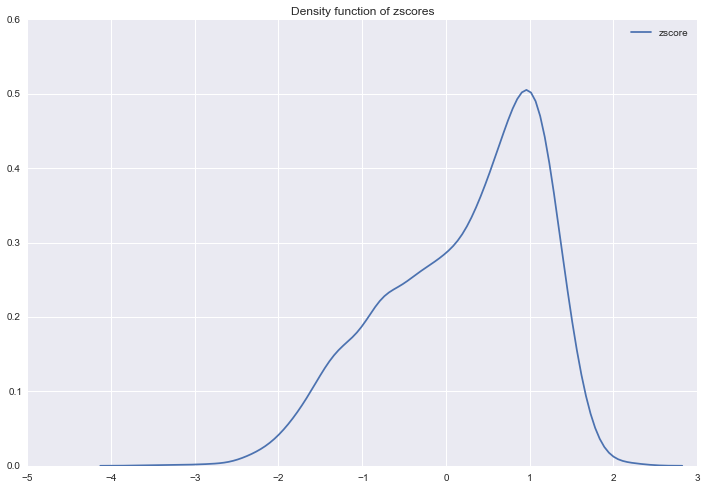

In [7]:
ax=sns.kdeplot(df.zscore,)
ax.set_title('Density function of zscores')

# Across the universe of markets
The goal is to calculate on all available markets to determine which markets are moving.  Once we have that then the presentation layer should be to send a daily email.

In [8]:
zscores=(data-pd.ewma(data,20))/pd.ewmstd(data,20)
x=zscores.tail(1)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)
  if __name__ == '__main__':


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


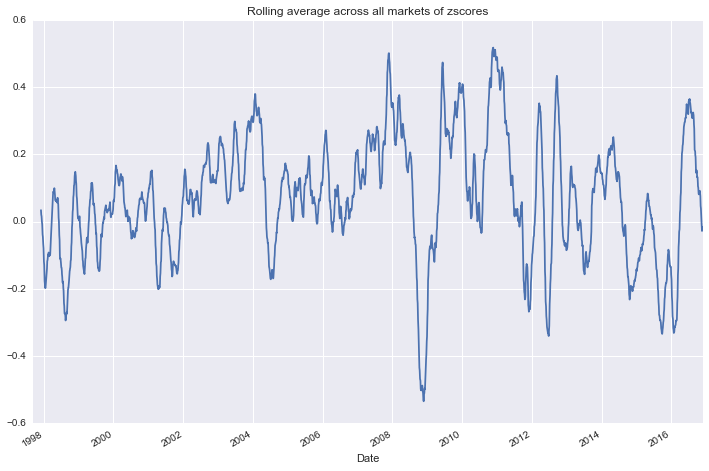

In [11]:
pd.rolling_mean(zscores.mean(axis=1).dropna(),60).plot(title='Rolling average across all markets of zscores')

In [49]:
# TODO: find out why I need to drop 10 rows (what's wrong with these markets)
x.T.sort_values(by=x.T.columns[0]).dropna()

Date,2016-11-25 00:00:00
Gold,-1.560709
US Treasuries 2 Yr,-1.360491
Eurodollar,-1.305494
US Treasuries 5 Yr,-1.288174
Platinum,-1.282686
US Treasuries 10 Yr,-1.227735
Sugar,-1.178713
Italian 2 year bonds,-1.142424
Wheat,-1.116432
Silver,-1.098285


In [30]:
d=zscores.tail(1).T.columns[0]
res=zscores.tail(1).T[d].dropna()

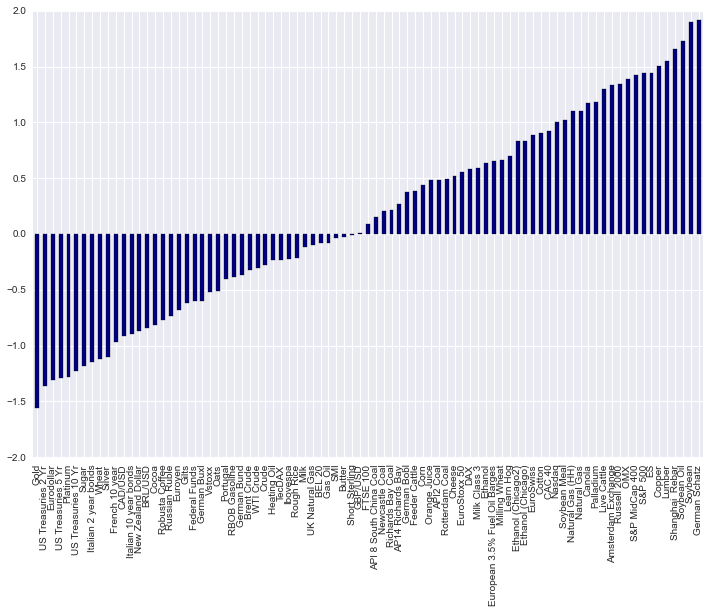

In [34]:
res.sort_values().plot(kind='bar',colormap='jet')

In [39]:
bottom=res.sort_values()[:5]
top=res.sort_values()[-5:]

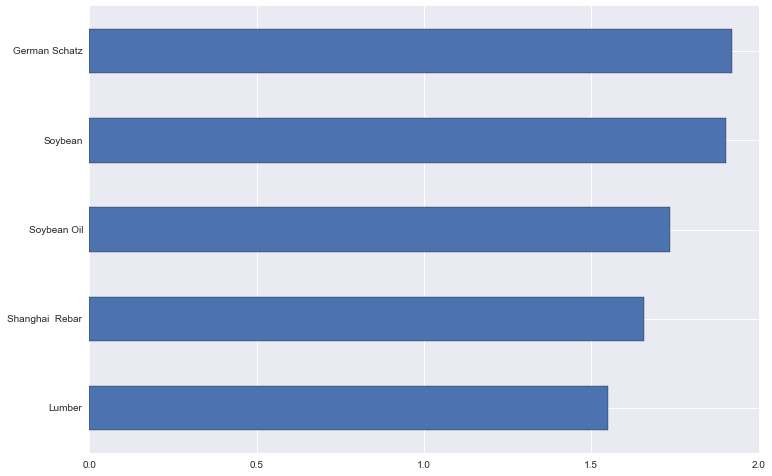

In [42]:
top.plot(kind='barh')

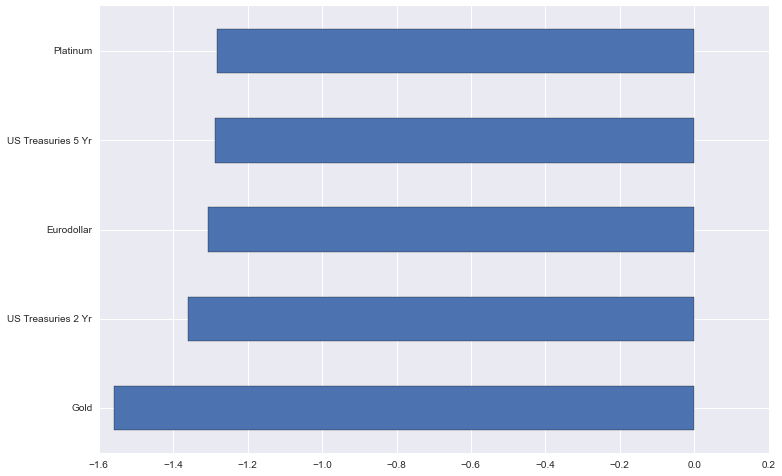

In [43]:
bottom.plot(kind='barh')

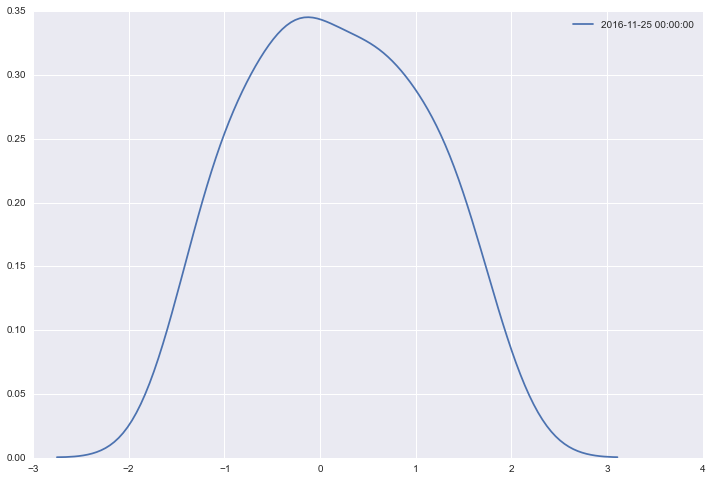

In [44]:
sns.kdeplot(res)